In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
proc = pd.read_csv('data/procedures.csv')
phy = pd.read_csv('data/physicians.csv')

In [3]:
phy['Cardiologist'] = pd.get_dummies(phy.specialty)['Cardiology']

In [4]:
phy.columns = ['physician_id','specialty','Cardiologist']

In [7]:
merged = pd.merge(proc, phy, left_on='physician_id',right_on='physician_id',how='outer')
indices=[]
for i,proc in enumerate(merged.procedure):
    w=[]
    w.append(proc.replace('_', ' '))
    if 'typically' in w[0].split():
        indices.append(i)

In [8]:
merged_not_typically = merged.drop(merged.index[list(indices)])
merged_not_typically = merged_not_typically.reset_index()
merged_not_typically.drop('index',axis=1,inplace=True)

In [9]:
merged_not_typically.head()

,physician_id,procedure_code,procedure,number_of_patients,specialty,Cardiologist
0,1,76942,ultrasonic_guidance_imaging_supervision_and_in...,14,Unknown,0
1,2,99238,"hospital_discharge_day_management,_30_minutes_...",16,Family Practice,0
2,3,99283,"emergency_department_visit,_moderately_severe_...",68,Emergency Medicine,0
3,3,99284,"emergency_department_visit,_problem_of_high_se...",87,Emergency Medicine,0
4,3,99285,"emergency_department_visit,_problem_with_signi...",267,Emergency Medicine,0


In [12]:
merged_not_typically_no_cards = merged_not_typically[merged_not_typically.specialty!='Cardiology']

In [14]:
merged_not_typically_no_cards.specialty.value_counts().head()

Unknown                 128501
Diagnostic Radiology     39139
Internal Medicine        22057
Family Practice          18463
Orthopedic Surgery        7406
Name: specialty, dtype: int64

In [19]:
procedure_words=[]
for line in merged_not_typically_no_cards.procedure:
    procedure_words.append(line.replace('_', ' '))

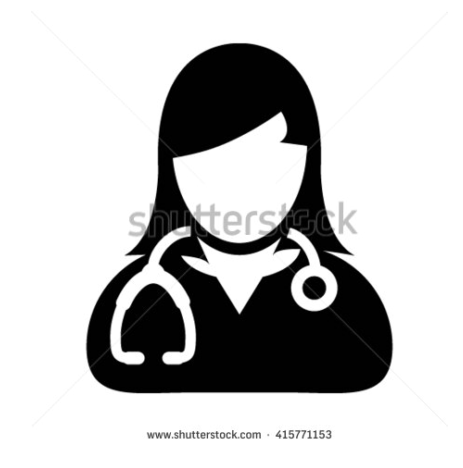

In [38]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

doc_mask = np.array(Image.open("stock-vector-woman-doctor-icon-female-physician-with-stethoscope-glyph-vector-illustration-415771153.jpg"))
wordcloud = WordCloud(stopwords=STOPWORDS,relative_scaling=.4,prefer_horizontal=0.6,max_words=500,min_font_size=9,mask=doc_mask,
                          background_color='white').generate(' '.join(procedure_words))


plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.figure(figsize=(15,8))
plt.imshow(doc_mask,cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()